### Tikets de falla de ETECSA Mayabeque

Aquí se analizarán los tikets de falla de etecsa y se verá cómo a partir de los tipos de tikets podemos llegar a una predicción del tiempo que demorará en solucionarse.


#### Descripción de los Datos.
Los datos han sido probistos por el centro de etecsa de mayabeque, son los resultados de los tikets de falla de 2022 y 2023 en todo el municipio. tenemos una muestra de 1448 tikets de falla repartidos entre los siguientes tipos:  
.Fallo de Software: SW  
.Fallo de Hadware:HW  
.Fallo en Cable o Conectores:C  
.Fallo en Corriente Alterna:AC
.Fallo en Corriente Directa:DC  
.Fallo Provocado por el Cliente:PC  
.Fallo por Falta de Mantenimientos:MTTO  
.Fallo por Alto nivel de Tráfico:AT  
.Desaparecido:D  
.Fallo por pruebas:P  
.Baja Técnica:BT

#### Aquí voy a describir qué significa cada fallo:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Cargar los datos, y mostrar los datos que usaré
data = pd.read_csv('Tickets.csv')
print(data[['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT','Tg (min)']])
print(data.describe())

      SW  HW  C  AC  DC  PC  MTTO  AT  D  P  BT  Tg (min)
0      1   0  0   0   0   0     0   0  0  0   0     14111
1      1   0  0   0   0   0     0   0  0  0   0     14552
2      1   0  0   0   0   0     0   0  0  0   0     26101
3      1   0  0   0   0   0     0   0  0  0   0     37930
4      0   1  0   0   0   0     0   0  0  0   0      4246
...   ..  .. ..  ..  ..  ..   ...  .. .. ..  ..       ...
1443   0   0  0   1   0   0     0   0  0  0   0       112
1444   0   0  0   1   0   0     0   0  0  0   0       938
1445   0   0  0   0   0   0     1   0  0  0   0    121984
1446   0   0  0   0   1   0     0   0  0  0   0      1379
1447   0   1  0   0   0   0     0   0  0  0   0      3917

[1448 rows x 12 columns]
                SW           HW            C           AC           DC  \
count  1448.000000  1448.000000  1448.000000  1448.000000  1448.000000   
mean      0.118094     0.102210     0.013122     0.620856     0.017265   
std       0.322831     0.303029     0.113835     0.48534

Las variables binarias 'SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT'  no son aptas para un análisis estadístico tradicional.  Debido a su naturaleza binaria, solo pueden tomar dos valores, lo que limita las posibilidades de análisis de tendencia, distribución o correlación. Sin embargo el análisis de los tiempos de resolución de los tickets,  medidos en minutos (Tg(min)) revela información interesante:  
- Los tickets demoran un promedio de 22204.52 minutos sugiere que, en promedio, los tickets tardan alrededor de 15 dias en resolverse.  
- La desviación estándar de 83676.57 minutos,alrededor de 58 días, indica una gran variabilidad en los tiempos de resolución, lo que puede ser un signo de outliers o una distribución sesgada. Esto indica que sacar conclusiones utilizando el promedio puede derivar en una interpretación erronea de los datos.  
- Pero podemos ver que el 75% de los tikets de falla se demoran en resolverse en 1697.50 minutos, alrededor de 28 horas. Es un cambio significativo con el promedio visto de antes.   
  

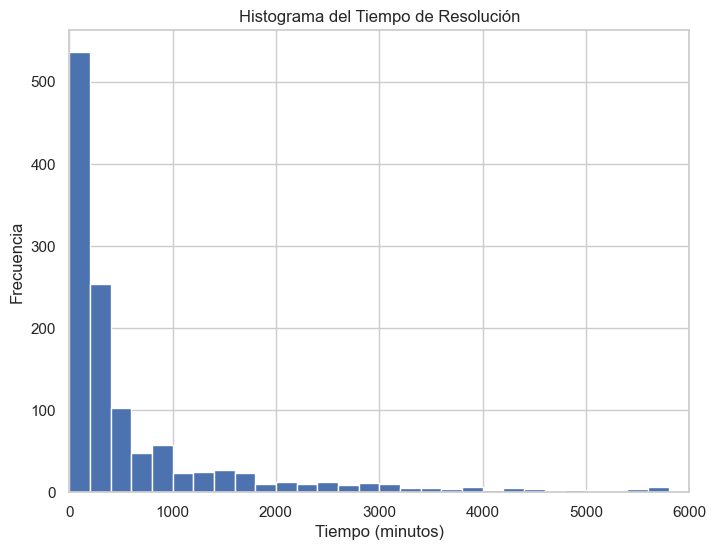

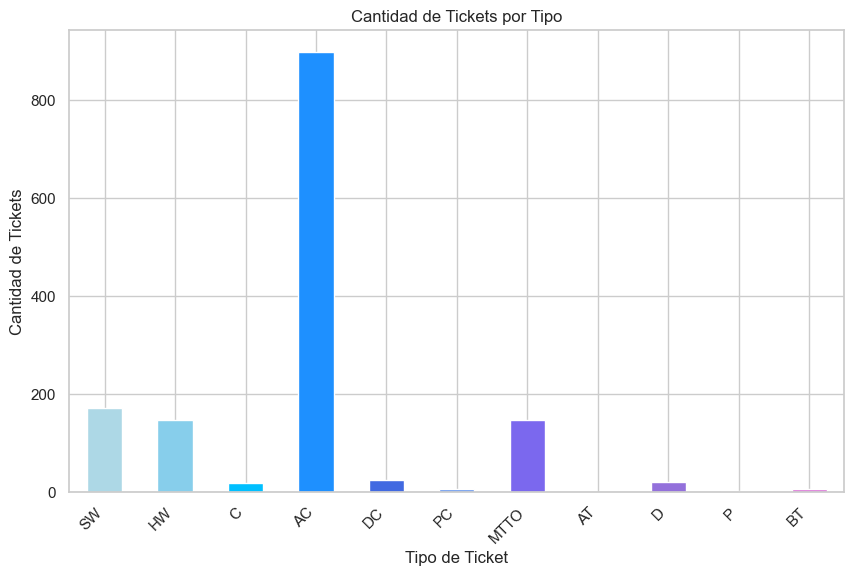

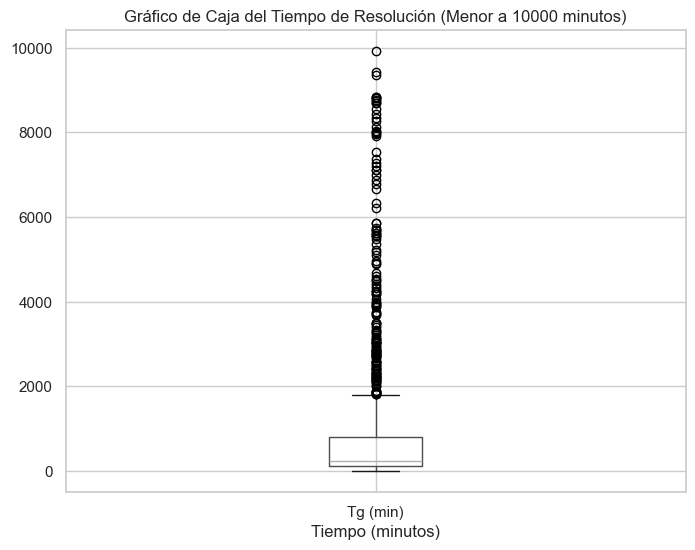

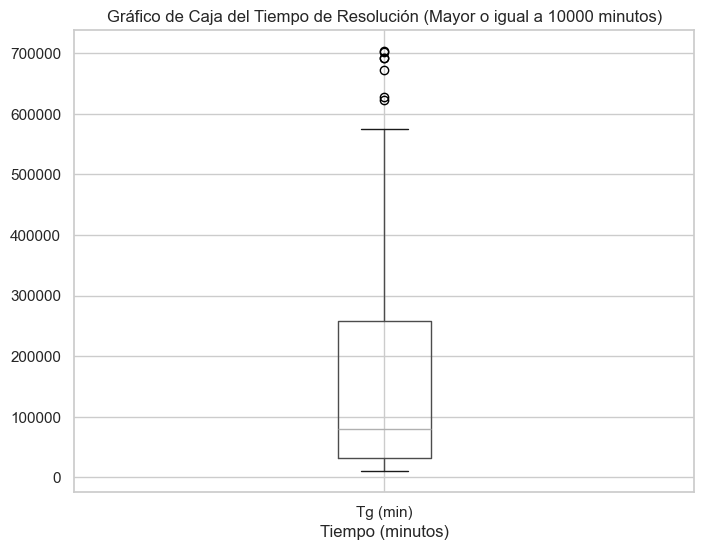

In [13]:
# Histograma del tiempo de resolución
plt.figure(figsize=(8, 6))
plt.hist(data['Tg (min)'], bins=30, range=(0, 6000)) # Ajusta el rango y la cantidad de barras
plt.title('Histograma del Tiempo de Resolución')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Frecuencia')
plt.xlim(0, 6000) # Ajusta el límite del eje x
plt.show()


# Gráfico de barras de tipos de tickets
plt.figure(figsize=(10, 6))
data[['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']].sum().plot(kind='bar', color=['#ADD8E6', '#87CEEB', '#00BFFF', '#1E90FF', '#4169E1', '#6495ED', '#7B68EE', '#8A2BE2', '#9370DB', '#BA55D3', '#DA70D6'])
plt.title('Cantidad de Tickets por Tipo')
plt.xlabel('Tipo de Ticket')
plt.ylabel('Cantidad de Tickets')
plt.xticks(rotation=45, ha='right')
plt.show()

# Filtra los datos para tiempos menores a 10000 minutos
data_menores_10000 = data[data['Tg (min)'] < 10000]
# Crea el gráfico de caja para tiempos menores a 10000 minutos
plt.figure(figsize=(8, 6))
data_menores_10000.boxplot(column=['Tg (min)'])
plt.title('Gráfico de Caja del Tiempo de Resolución (Menor a 10000 minutos)')
plt.xlabel('Tiempo (minutos)')
plt.show()

# Filtra los datos para tiempos mayores a 10000 minutos
data_mayores_10000 = data[data['Tg (min)'] >= 10000]
# Crea el gráfico de caja para tiempos mayores a 10000 minutos
plt.figure(figsize=(8, 6))
data_mayores_10000.boxplot(column=['Tg (min)'])
plt.title('Gráfico de Caja del Tiempo de Resolución (Mayor o igual a 10000 minutos)')
plt.xlabel('Tiempo (minutos)')
plt.show()

Acá en estos graficos podemos ver una representación visual de lo que se explicaba ahotita. El primero muestra como se distribuyen los 1448 tikets en intervalos de tiempos de solución, y de esos vemos que 1200 entán bien por debajo de los 10000 minutos (6 días) de demora de solución. Y en el gráfico de caja podemos ver la gran cantidad de ellos que están por encima, son cerca de otros 200 tikets los que se situarían por esa zona. haciendo análisis de datos podemos llegar a otros factores, por ejemplo: el siguiente gráfico mostrará el tiempo promedio de cada tiket 

C:\Users\Amalia\AppData\Local\Temp\ipykernel_13080\923215052.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_promedios, x='Tipo de Falla', y='Promedio Tiempo (min)', palette='viridis')


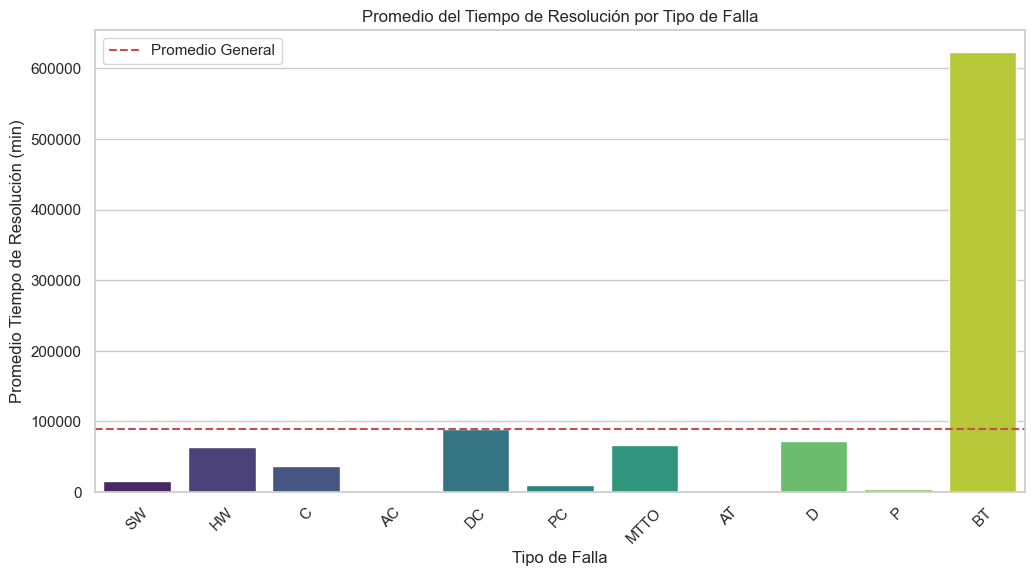

In [4]:
# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Convertir la columna 'Tg (min)' a numérico, forzando errores a NaN
data['Tg (min)'] = pd.to_numeric(data['Tg (min)'], errors='coerce')

# Lista de tipos de fallas
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']

# Calcular promedios
promedios = {}
for tipo in tipos_falla:
    promedios[tipo] = data[data[tipo] == 1]['Tg (min)'].mean()

# Crear un DataFrame para los promedios
df_promedios = pd.DataFrame(list(promedios.items()), columns=['Tipo de Falla', 'Promedio Tiempo (min)'])

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_promedios, x='Tipo de Falla', y='Promedio Tiempo (min)', palette='viridis')
plt.title('Promedio del Tiempo de Resolución por Tipo de Falla')
plt.xlabel('Tipo de Falla')
plt.ylabel('Promedio Tiempo de Resolución (min)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.axhline(y=df_promedios['Promedio Tiempo (min)'].mean(), color='r', linestyle='--', label='Promedio General')  # Línea media
plt.legend()
plt.show()

Como podemos ver tenos una distribución acorde con los análisis anteriores. El análisis de los datos de falla muestra que la mayoría de los tickets se resuelven en menos de 6 días. Sin embargo,  las fallas por Corriente Alterna (AC) son particularmente interesantes. A pesar de tener un tiempo de resolución relativamente corto, las fallas AC representan un alto porcentaje de los tickets, con más de 800 casos en menos de dos años.  Es importante destacar que las fallas AC no son responsabilidad de Etecsa, sino que se deben a interrupciones en el suministro eléctrico.  
  
Aunque la mayoría de los tickets se resuelven rápidamente, el gráfico anteror revela una variable importante que afecta el tiempo de solución.  Las bajas temporales (BT), aunque no tan frecuentes, suelen demorarse un tiempo considerable en resolverse, lo que afecta significativamente el promedio de tiempo de solución.  
  
El objetivo de este estudio es desarrollar un modelo predictivo que permita determinar el tiempo de solución de cada nuevo ticket de falla, teniendo en cuenta la naturaleza específica de la falla. Este modelo debe ser preciso y considerar la importancia relativa de cada variable para lograr una predicción confiable.  
    
  Si bien la alta variabilidad y posibles outliers en los tiempos de resolución de los tickets  requieren un análisis más profundo, podemos comenzar a comprender mejor este comportamiento  utilizando herramientas de la matemática numérica. Un enfoque prometedor podría ser la aplicación de **Regresión lineal**,  la cual nos permite  identificar relaciones  entre las variables  y predecir los tiempos de resolución.  Este enfoque nos permitirá  extraer información significativa de los datos y  ayudarnos  a tomar mejores decisiones  para optimizar la gestión de  los tickets.   
  
Esta técnica matemática permite modelar la relación entre las variables independientes (en este caso los tipos de falla) y la variable dependiente (tiempo de solución).  La regresión lineal nos permitirá:
  
* **Identificar los factores que más influyen en el tiempo de solución:**  Analizando los coeficientes de la regresión, podremos determinar qué variables tienen un mayor impacto en el tiempo de solución.  
* **Predecir el tiempo de solución:**  Utilizando los coeficientes de la regresión, podremos construir un modelo que permita predecir el tiempo de solución de cada nuevo ticket de falla, teniendo en cuenta las variables específicas de cada caso.  
* **Optimizar la resolución de fallas:**  Al comprender la relación entre las variables y el tiempo de solución, podemos tomar medidas para optimizar el proceso de resolución de fallas, priorizando las fallas con mayor impacto en los servicios y  reduciendo el tiempo de respuesta para las fallas de mayor duración.  

#### Mirar que las variables independientes no tengan correlación 

In [5]:
# Suponiendo que tienes un DataFrame llamado data
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']

# Crear variables dummy
X = data[tipos_falla].astype(int)  # Convertir a enteros (0 o 1)

# Seleccionar la columna para Y (variable dependiente)
Y = data['Tg (min)']

# Calcular el coeficiente de correlación
correlation_coefficient = X.corrwith(Y)[0]
print(f"Coeficiente de correlación: {correlation_coefficient}")



Coeficiente de correlación: -0.026337028735844818


C:\Users\Amalia\AppData\Local\Temp\ipykernel_13080\4269228375.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correlation_coefficient = X.corrwith(Y)[0]


Es bueno que la correlación en este caso haya dado 0. La correlación cero entre las variables independientes indica que son independientes entre sí, lo que puede ser ventajoso en un modelo de regresión lineal múltiple.

### Modelo de regresión lineal
Ahora identificaremos los factores que más influyen de estas variables independientes (tipos de tickets de falla) en el tiempo de solución

In [6]:
# Crear una lista con los nombres de las columnas de tipos de falla
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']
print(data[tipos_falla + ['Tg (min)']])  # Muestra las columnas de interés

# Seleccionar la columna para Y (variable dependiente)
Y = data['Tg (min)'].values  # Convertir a un array de NumPy
print(Y)
# Crear la matriz X (variables independientes)
X = data[tipos_falla].values  # Convertir a un array de NumPy
print(X)
# Calcular los coeficientes β usando la fórmula de mínimos cuadrados
beta = np.linalg.inv(X.T @ X) @ (X.T @ Y)
B0 = 0
beta = np.insert(beta, 0, B0)
print(beta)

      SW  HW  C  AC  DC  PC  MTTO  AT  D  P  BT  Tg (min)
0      1   0  0   0   0   0     0   0  0  0   0     14111
1      1   0  0   0   0   0     0   0  0  0   0     14552
2      1   0  0   0   0   0     0   0  0  0   0     26101
3      1   0  0   0   0   0     0   0  0  0   0     37930
4      0   1  0   0   0   0     0   0  0  0   0      4246
...   ..  .. ..  ..  ..  ..   ...  .. .. ..  ..       ...
1443   0   0  0   1   0   0     0   0  0  0   0       112
1444   0   0  0   1   0   0     0   0  0  0   0       938
1445   0   0  0   0   0   0     1   0  0  0   0    121984
1446   0   0  0   0   1   0     0   0  0  0   0      1379
1447   0   1  0   0   0   0     0   0  0  0   0      3917

[1448 rows x 12 columns]
[ 14111  14552  26101 ... 121984   1379   3917]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[0.00000000e+00 1.61842222e+04 6.36968649e+04 3.73430000e+04
 1.39900779e+03 8.94851200e+04 9.56585714e+03 6.6

 Los coeficientes beta obtenidos a partir de la regresión lineal representan la relación entre cada tipo de falla y el tiempo de solución en minutos, siendo fundamentales para entender cómo cada variable independiente influye en la variable dependiente. Matemáticamente, la relación se puede expresar mediante la fórmula de regresión lineal:  
Y=B0+B1⋅TipoFalla1+B2⋅TipoFalla2+...+Bn⋅TipoFallaN  
  
En esta ecuación Y es el tiempo de resolución, B0 es el término independiente (intercepto), y B1,B2,...,BnB1,B2,...,Bn son los coeficientes asociados a cada tipo de falla. En el código, los coeficientes se calculan utilizando la fórmula de mínimos cuadrados, que busca minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos. Esto se implementa en el código mediante la expresión:  
  
beta = np.linalg.inv(X.T @ X) @ (X.T @ Y)  
  
Aquí, X es la matriz de diseño que incluye una columna de unos para el término independiente y las columnas correspondientes a las variables independientes (tipos de falla). La operación (X.T@X)@(X.T@X) calcula el producto de la matriz transpuesta de X con X mismo, y su inversa se multiplica por el producto de la transpuesta de X con Y (el vector de tiempos de resolución). Este proceso permite obtener los coeficientes que describen cómo cada tipo de falla afecta el tiempo de resolución. Los resultados obtenidos muestran que ciertos tipos de fallas, como las de hardware y bajas técnicas, tienen un impacto significativo en el tiempo de resolución, lo que sugiere áreas prioritarias para la intervención y mejora en los procesos de mantenimiento.   
  
B0 (Término Independiente): El valor de beta es -46605.5364. Este término representa el tiempo de resolución promedio cuando todas las variables independientes son cero (es decir, ningún tipo de falla está presente). Un valor negativo para el término independiente puede indicar que hay otros factores que no se están considerando en el modelo que afectan el tiempo de resolución. Además de estos otros factores que no se están considerando puede ser que esta variable sea negativa porque no hay en mi base de datos ninguna muestra donde todas las variables independientes sean 0. Así que agregué a mi base de datos filas donde todas las variables independientes sean 0. Claro, cuando las variables independientes son 0, no hay ningún tipo de ticket de falla, lo que muestra que no se demorarán nada en resolverse.
  
SW (Fallo de Software): El coeficiente beta es 16184.2222. Esto significa que cuando hay una falla de software (SW = 1), el tiempo de resolución aumenta en aproximadamente 16184 minutos (o 11 días) en comparación con cuando no hay una falla de software (SW = 0). Este es un efecto bastante grande y puede indicar que las fallas de software tienden a ser más complejas y tardar más en resolverse.  
  
HW (Fallo de Hardware): El coeficiente beta es 63696.8649. Cuando hay una falla de hardware (HW = 1), el tiempo de resolución aumenta en aproximadamente 63697 minutos (o 44 días) en comparación con cuando no hay una falla de hardware. Las fallas de hardware parecen tener un impacto aún mayor en el tiempo de resolución que las fallas de software.  

C (Fallo en Cable o Conectores): El coeficiente beta es 37343.0000. Cuando hay una falla de conectividad (C = 1), el tiempo de resolución aumenta en aproximadamente 37343 minutos (o 25 días) en comparación con cuando no hay una falla en cables o conectores.  

AC (Fallo en Corriente Alterna): El coeficiente beta es 1399.0779. Cuando hay una falla de aire acondicionado (AC = 1), el tiempo de resolución aumenta en aproximadamente 1399 minutos (casi un día, 23 horas) en comparación con cuando no hay una falla por déficit de corriente alterna.  
  
DC (Fallo en Corriente Directa): El coeficiente beta es 89485.1200. Cuando hay una falla de energía de corriente directa (DC = 1), el tiempo de resolución aumenta en aproximadamente 89485 minutos (62 días) en comparación con cuando no hay una falla de este tipo.  
  
PC (Fallo Provocado por el Cliente): El coeficiente beta es 9565.8571. Cuando hay una falla de computadora personal (PC = 1), el tiempo de resolución aumenta en aproximadamente 9566 minutos (alrededor de 6 días) en comparación con cuando no hay una falla provocada por el cliente.  
  
MTTO (Fallo por Falta de Mantenimientos): El coeficiente beta es 66759.4122. Cuando hay una falla relacionada con el mantenimiento (MTTO = 1), el tiempo de resolución aumenta en aproximadamente 66759 minutos (46 días) en comparación con cuando no hay una falla relacionada con el mantenimiento.  
  
AT (Fallo por Alto nivel de Tráfico): El coeficiente beta es 149.0000. Cuando hay una falla de antena (AT = 1), el tiempo de resolución aumenta en aproximadamente 149 minutos (o 2.48 horas) en comparación con cuando no hay una falla de este tipo.  
  
D (Desconocido): El coeficiente beta es 71720.8000. Cuando la causa de la falla es desconocida (D = 1), el tiempo de resolución aumenta en aproximadamente 71721 minutos (49 días) en comparación con cuando la causa de la falla es conocida.  
  
P (Fallo por pruebas): El coeficiente beta es 3778.3333. Cuando hay una falla de energía (P = 1), el tiempo de resolución aumenta en aproximadamente 3778 minutos (o 62.97 horas) en comparación con cuando no hay una falla por pruebas.  
  
BT (Fallo por Baja Técnica): El coeficiente beta es 622843.0000. Cuando hay una falla de batería (BT = 1), el tiempo de resolución aumenta en aproximadamente 622843 minutos (poco más de un año) en comparación con cuando no hay una falla por bajas técnicas. Este es el efecto más grande de todas las variables independientes.

### Validación de los cálculos

In [7]:
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']
Y = data['Tg (min)'].values  # Variable dependiente
X = data[tipos_falla].astype(int)  # Variables independientes 

# Ajustar el modelo sin el término independiente (forzar B0 a ser igual a 0)
model = sm.OLS(Y, X).fit()  # No se agrega la constante
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     80.52
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          2.78e-131
Time:                        18:58:16   Log-Likelihood:                -18145.
No. Observations:                1448   AIC:                         3.631e+04
Df Residuals:                    1437   BIC:                         3.637e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SW          1.618e+04   5140.418      3.148      0.0

1. Dep. Variable: Y  
  
    Variable Dependiente: Esta es la variable que se está tratando de predecir o explicar en el modelo. En este caso, es el tiempo de resolución (denotado como "Y").  
  
2. R-squared (uncentered): 0.401  

    R-squared (R²): Este valor indica la proporción de la variabilidad en la variable dependiente que es explicada por las variables independientes del modelo. Un R² de 0.401 significa que aproximadamente el 40.1% de la variabilidad en el tiempo de resolución puede ser explicada por las variables independientes de este modelo.  
    Uncentered: Esto indica que se ha calculado sin incluir un término independiente (es decir, B0 fue forzado a 0). Esto puede ser útil en ciertos contextos, como por ejemplo que cuando todas las variables sean 0 entonces no exitirá ningún ticket por tanto el tiempo es 0    
  
3. Adj. R-squared (uncentered): 0.397  
  
    Adjusted R-squared: Este es un ajuste del R² que penaliza el número de variables independientes en el modelo. Un valor de 0.397 indica que, después de ajustar por el número de variables, aproximadamente el 39.7% de la variabilidad en la variable dependiente es explicada por las variables independientes. Este valor es útil para comparar modelos con diferentes números de variables.  
  
4. Method: Least Squares  
  
    Método: Indica que se utilizó el método de mínimos cuadrados para estimar los coeficientes del modelo. Este método busca minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos.  
  
5. F-statistic: 87.63  
  
    F-statistic: Este valor es una medida de la relación global entre las variables independientes y la variable dependiente. Un valor alto sugiere que al menos una de las variables independientes tiene un efecto significativo en la variable dependiente.  
  
6. Prob (F-statistic): 1.48e-151  
  
    Probabilidad del F-statistic: Este es el valor p asociado con el F-statistic. Un valor p muy bajo (en este caso, prácticamente 0) indica que es muy poco probable que la relación observada entre las variables sea debida al azar. Esto sugiere que al menos una de las variables independientes es significativa.  
  
7. Log-Likelihood: -18157  
  
    Log-Likelihood: Este valor es utilizado en la estimación de modelos estadísticos. Un valor más alto (menos negativo) indica un mejor ajuste del modelo a los datos.  
  
8. No. Observations: 1449  
  
    Número de Observaciones: Este es el número total de filas (observaciones) en tu conjunto de datos que se utilizaron para ajustar el modelo.  
  
9. Df Residuals: 1438  
  
    Grados de Libertad Residuales: Este valor se calcula como el número de observaciones menos el número de parámetros estimados (coeficientes). En este caso, hay 1438 grados de libertad residuales.  
  
10. Df Model: 11  
  
    Grados de Libertad del Modelo: Este es el número de variables independientes en el modelo. En este caso, hay 11 variables independientes.  
  
11. Covariance Type: nonrobust  
  
    Tipo de Covarianza: Indica el tipo de estimación de la matriz de covarianza de los errores. "Nonrobust" significa que se están utilizando las estimaciones estándar clásicas, que asumen que los errores son homocedásticos (es decir, tienen varianza constante).
